<a href="https://colab.research.google.com/github/simeonubi/Disaster_classifier-/blob/main/data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from nltk.tokenize import WordPunctTokenizer
from wordcloud import WordCloud, STOPWORDS 
#nltk.download('punkt')
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import pickle
import string
import codecs
import os
import re

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/Uyime's Project/train.csv")

In [ ]:
train_data.shape #this shows that we have 7613 tweets

(7613, 5)

In [ ]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
train_data = train_data.drop(["id", "keyword", "location"], axis=1) #droped irrelevant colums

In [ ]:
train_data.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
 #seperate the two classes of text; 
 #target_txt1 = 0(not a disaster tweet)
 #target_txt2 = 1(disaster tweet)
 #this will help us carry out named entity on disaster tweet to determine Location of disaster
 #will also help us carry out word cloud visualisation to determine the frequency of disaster event
 target_txt1, target_txt2 = [t for _, t in train_data.groupby('target')] 

In [ ]:
print(target_txt2)

                                                   text  target
0     Our Deeds are the Reason of this #earthquake M...       1
1                Forest fire near La Ronge Sask. Canada       1
2     All residents asked to 'shelter in place' are ...       1
3     13,000 people receive #wildfires evacuation or...       1
4     Just got sent this photo from Ruby #Alaska as ...       1
...                                                 ...     ...
7608  Two giant cranes holding a bridge collapse int...       1
7609  @aria_ahrary @TheTawniest The out of control w...       1
7610  M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...       1
7611  Police investigating after an e-bike collided ...       1
7612  The Latest: More Homes Razed by Northern Calif...       1

[3271 rows x 2 columns]


In [ ]:
train_data['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

##Data Cleaning

In [ ]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't", "u" ])

In [ ]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    phrase = re.sub(r"\'u", " you", phrase)
    return phrase

In [ ]:
from tqdm import tqdm

# tqdm is for printing the status b
def process_text(text):
  preprocessed_text = []
  for text in tqdm(text):
    text = re.sub(r"http\S+", "", text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = decontracted(text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    text = re.sub("\S*\d\S*", "", text).strip()
    text = re.sub('[^A-Za-z]+', ' ', text)
    # https://gist.github.com/sebleier/554280
    text = ' '.join(e.lower() for e in text.split() if e.lower() not in stopwords)
    preprocessed_text.append(text.strip())
  return preprocessed_text    
    

In [ ]:
cleaned_disaster_class = process_text(target_txt2.text)

100%|██████████| 3271/3271 [00:00<00:00, 15420.50it/s]


In [ ]:
print(cleaned_disaster_class[1])

forest fire near la ronge sask canada


In [ ]:
y = train_data.target

In [ ]:
y.shape

(7613,)

In [ ]:
preprocessed_text[3]

'people receive wildfires evacuation orders california'

##NAMED ENTITY

In [ ]:
!pip3 install truecase

     |████████████████████████████████| 28.4MB 156kB/s 


In [ ]:
#for Named Entity Recognition I used Stanford Named Entity Tagger for it accuracy
#I downloaded the pretrained CoreNLP for Natural language processing
#I used the 3 class named entity since what we want to tag is just Locations 
from nltk.tag import StanfordNERTagger
from nltk.tokenize import word_tokenize

st = StanfordNERTagger('/content/drive/MyDrive/stanford-ner-4.2.0.zip (Unzipped Files)/stanford-ner-2020-11-17/classifiers/english.all.3class.distsim.crf.ser.gz',
					   '/content/drive/MyDrive/stanford-ner-4.2.0.zip (Unzipped Files)/stanford-ner-2020-11-17/stanford-ner.jar',
					   encoding='utf-8')

ner = []

for txt in target_txt2.text:
	tokenized_text = word_tokenize(truecase.get_true_case(txt))
	classified_text = st.tag(tokenized_text)
	ner.append(classified_text)
#print(classified_text)

/usr/local/lib/python3.6/dist-packages/nltk/tag/stanford.py:183: DeprecationWarning: 
The StanfordTokenizer will be deprecated in version 3.2.5.
Please use nltk.tag.corenlp.CoreNLPPOSTagger or nltk.tag.corenlp.CoreNLPNERTagger instead.
  super(StanfordNERTagger, self).__init__(*args, **kwargs)


In [ ]:
pickle.dump(ner, open('name_entity.pkl', 'wb'))

##WORD CLOUD

In [ ]:
def wdcloud(text, stopword=stopwords):
  words_tweet = ''
  for txt in text:
    tokens = txt.split()

    for i in range(len(tokens)):
      tokens[i] = tokens[i].lower()
      words_tweet += " ".join(tokens)+" "
  wc = WordCloud(width = 800, height = 800, 
				background_color ='white', 
				stopwords = stopwords, 
				min_font_size = 10).generate(words_tweet)
  return wc        
    


In [ ]:
wr_cloud = wdcloud(cleaned_disaster_class)

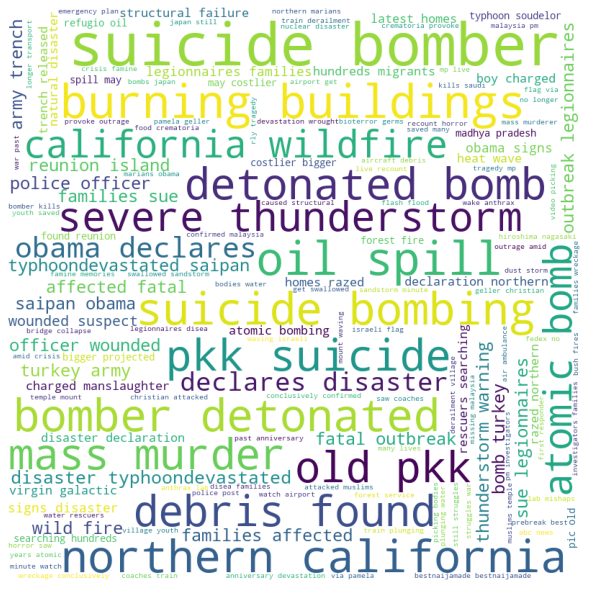

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wr_cloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

In [ ]:
ner_disaster_data = pd.read_pickle("/content/drive/MyDrive/Uyime's Project/name_entity.pkl")

In [ ]:
ner_disaster_data[3]

[('13,000', 'O'),
 ('people', 'O'),
 ('receive', 'O'),
 ('#', 'O'),
 ('Wildfires', 'O'),
 ('evacuation', 'O'),
 ('orders', 'O'),
 ('in', 'O'),
 ('California', 'LOCATION')]

In [ ]:
#this code is used to fillter out tweets that Location of disater was mentioned.
#in total we have 1935 tweets that Location of disaster was mention out of 3271
loc = []

for txt in ner_disaster_data:
  for i in txt:
    if 'LOCATION' in i:
      loc.append(txt)

In [ ]:
len(loc)

1935

In [ ]:
# cleaned_txt = np.array(preprocessed_text)
# label = np.array(y)

In [ ]:
# indices = np.arange(len(cleaned_txt))
# np.random.shuffle(indices)
# cleaned_txt = cleaned_txt[indices]
# labels = label[indices]


In [ ]:
# tf_idf_vect = TfidfVectorizer(ngram_range=(1,2), min_df=10)
# tf_idf_vect.fit(cleaned_txt)
# print("some sample features(unique words in the corpus)",tf_idf_vect.get_feature_names()[0:10])
# print('='*50)

# final_tf_idf = tf_idf_vect.transform(prepro_article_array)
# print("the type of count vectorizer ",type(final_tf_idf))
# print("the shape of out text TFIDF vectorizer ",final_tf_idf.get_shape())
# print("the number of unique words including both unigrams and bigrams ", final_tf_idf.get_shape()[1])

In [ ]:
# X_train_tf, y_train_tf  = final_tf_idf[], labels[]
# X_test_tf, y_test_tf = final_tf_idf[], labels[]